## Import Packages and Extract the Data from Text File

In [29]:
import os
from IPython.display import display
import numpy as np
import pandas as pd
import pandas_profiling as pdpf
pwd = os.getcwd()
txt_path = os.path.join(pwd, "exp1_data")
print("Data is in the path",txt_path)

def extract_data(txt_name: str, txt_path: str, df_names):
    df = pd.read_csv(os.path.join(txt_path,txt_name),header=None,names = df_names)
    return np.array(df)
train_x_pre = extract_data("xtrain.txt",txt_path,("x","y"))
train_y = extract_data("ctrain.txt",txt_path,("label",))[:,0]

Data is in the path C:\Programs\GitHub\StatLearning\exp1_data


## Generate the Data Report

In [30]:
# report = pdpf.ProfileReport(df)
# display(report)

## Normalize the Data

In [31]:
def normalize(mat):
    data_mean = np.mean(mat, axis=0)
    data_var = np.var(mat, axis=0)
    mat = mat - data_mean
    mat = np.divide(mat, np.sqrt(data_var))
    return mat

train_x = normalize(train_x_pre)

## Show the Data after Preprocessing

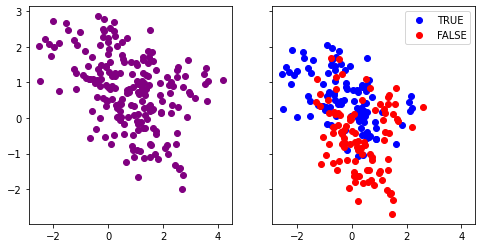

In [35]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1,2,sharex=True,sharey=True,figsize = (8,4))
ax1.plot(train_x_pre[:,0],train_x_pre[:,1],'o',color = "purple")
ax1.set_aspect('auto')
ax2.plot(train_x[train_y == 1,0],train_x[train_y == 1,1],'o',color = "blue", label = "TRUE")
ax2.plot(train_x[train_y == 0,0],train_x[train_y == 0,1],'o',color = "red", label = "FALSE")
ax2.legend()
plt.show()